In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [5]:
## ??datasets.fetch_openml

In [6]:
pixel_values, targets = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

#### There are ```70,000``` images of size ```28 x 28``` in flattened form

In [7]:
pixel_values.shape

(70000, 784)

#### Viewing the first image

In [13]:
pixel_values[0, :].shape

(784,)

In [16]:
single_image = pixel_values[0, :]
single_image = single_image.reshape(28,28)
single_image.shape

(28, 28)

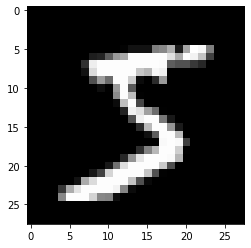

In [18]:
plt.imshow(single_image, cmap = 'gray')

### tSNE

In [20]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [21]:
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [22]:
transformed_data

array([[ -5.281551 , -28.952768 ],
       [-26.105896 , -68.06932  ],
       [-42.503582 ,  35.58039  ],
       ...,
       [ 13.466378 ,  47.369007 ],
       [ -2.4357524,   7.983772 ],
       [ -4.2482643, -13.26691  ]], dtype=float32)

In [24]:
transformed_data.shape

(3000, 2)

In [25]:
tsne = np.column_stack(transformed_data)
tsne.shape

(2, 3000)

In [31]:
print('transformed_data shape: ', transformed_data.shape)
print('targets shape         : ', targets[:3000].shape)
tsne = np.column_stack((transformed_data, targets[:3000]))
tsne

transformed_data shape:  (3000, 2)
targets shape         :  (3000,)


array([[-5.281550884246826, -28.952768325805664, '5'],
       [-26.10589599609375, -68.06932067871094, '0'],
       [-42.50358200073242, 35.58039093017578, '4'],
       ...,
       [13.466378211975098, 47.3690071105957, '9'],
       [-2.4357523918151855, 7.983771800994873, '1'],
       [-4.248264312744141, -13.2669095993042, '5']], dtype=object)

In [32]:
tsne_df = pd.DataFrame(tsne, columns=["d1", "d2", "targets"])

In [33]:
tsne_df.head()

,d1,d2,targets
0,-5.28155,-28.9528,5
1,-26.1059,-68.0693,0
2,-42.5036,35.5804,4
3,38.894,26.6634,1
4,-14.7706,35.4332,9


In [34]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   d1       3000 non-null   object
 1   d2       3000 non-null   object
 2   targets  3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [36]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

#### sns visuals

/Users/felix/.pyenv/versions/3.6.9/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


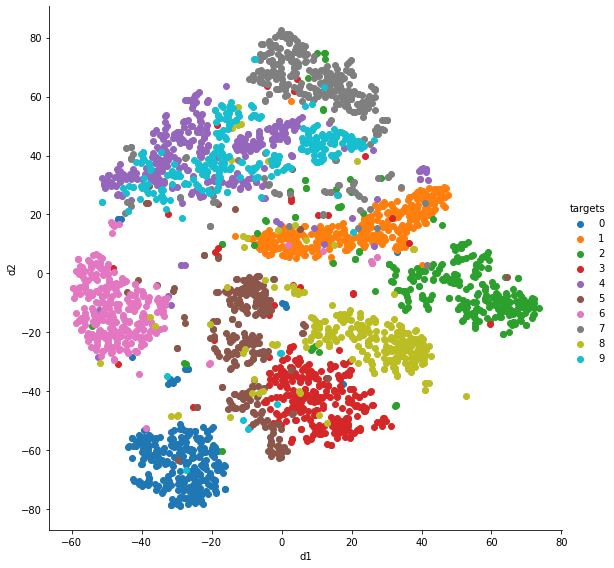

In [38]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "d1", "d2").add_legend()

### Altair visuals

In [45]:
import altair as alt
source = tsne_df
source['targets'] = source['targets'].astype(str)

alt.Chart(source).mark_circle().encode(
    alt.X('d1', scale=alt.Scale(zero=False)),
    alt.Y('d2', scale=alt.Scale(zero=False, padding=1)),
    color='targets'
)

alt.Chart(...)

In [ ]:
### how to get cluster id from tsne ?